In [1]:
#el objectivo acá es lograr los autputs de SDI con un script de python

In [1]:
#setear el directorio de trabajo
import os

ruta_nueva = "C:/Dinagua/Scripts_R_indice_caudales_mensuales"
os.chdir(ruta_nueva)

In [3]:
#instalar bibliotecas
#!pip install plotnine
#pip install matplotlib

In [4]:
#!pip install --upgrade mizani
#!pip install --upgrade plotnine

In [2]:
import pandas as pd
from plotnine import ggplot, geom_bar, aes, scale_fill_manual, theme, element_text
import matplotlib.pyplot as plt

In [3]:
# Definir parametros de entrada
name_station = "fraymarcos"
name_station_plot = "Fray Marcos"
codigo_station = "44.0"
scale_sdi = 3
mes = "octubre"

In [4]:
# Construir el nombre del archivo
filename = os.path.join("teste", f"{scale_sdi}-month_CompleteSDI_octubre_{name_station.replace(' ', '')}.txt")

# Leer el archivo CSV con parse_dates
d = pd.read_csv(filename, sep=",", parse_dates=["Fecha"])

In [12]:
# Importar la biblioteca datetime
from datetime import datetime, timedelta

# Obtener la fecha actual
fecha_actual = datetime.now()

# Calcular la fecha de hace dos años
fecha_dos_anos_atras = fecha_actual - timedelta(days=365 * 2.2)

# Filtrar el DataFrame para incluir solo las filas de los últimos dos años
d_ultimos_dos_anos = d[d['Fecha'] >= fecha_dos_anos_atras]

In [13]:
# Eliminar filas con valores NaN en 'GammaSDI'
d_ultimos_dos_anos = d_ultimos_dos_anos.dropna(subset=['GammaSDI'])

# Clasificar los valores de 'GammaSDI' en categorías
bins = [-10, -2, -1.5, -1, 0, 10]  # Definir los límites de las categorías
labels = ["Sequía extrema", "Sequía severa", "Sequía moderada", "Sequía leve", "No sequía"]

# Crear una nueva columna 'State_sdi' con las categorías clasificadas
d_ultimos_dos_anos['State_sdi'] = pd.cut(d['GammaSDI'], bins=bins, labels=labels, right=False)

# Mostrar las primeras filas del DataFrame con la nueva columna
print(d_ultimos_dos_anos[['GammaSDI', 'State_sdi']].head())

     GammaSDI        State_sdi
502     -0.74      Sequía leve
503     -1.36  Sequía moderada
504     -0.60      Sequía leve
505     -0.41      Sequía leve
506     -0.42      Sequía leve


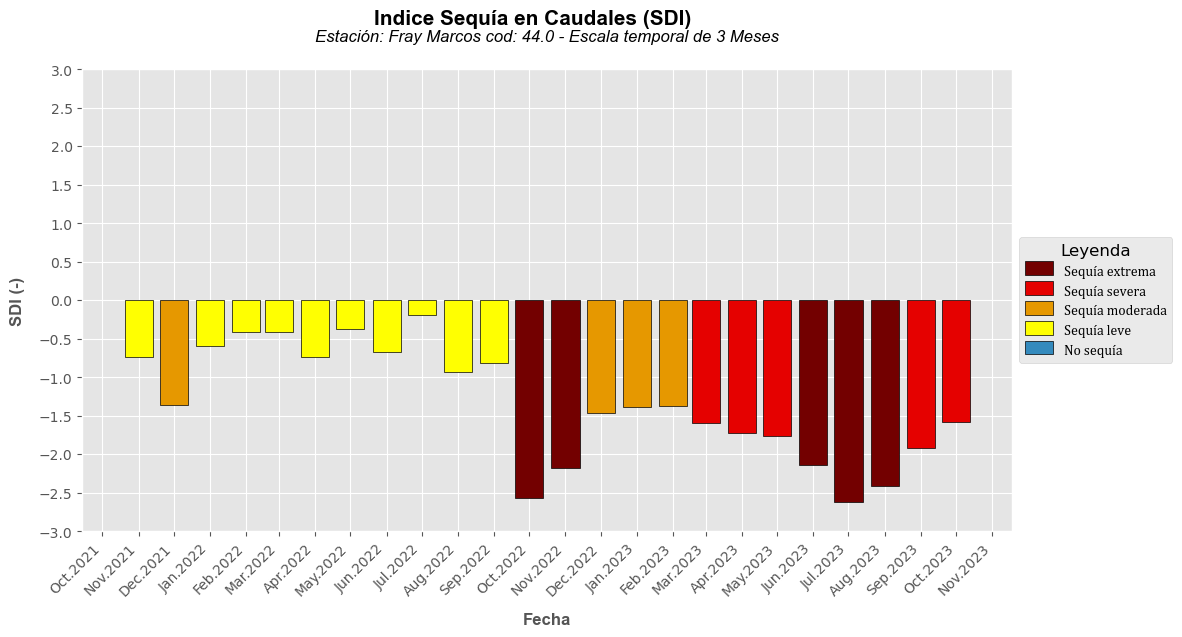

In [14]:
from matplotlib.dates import MonthLocator, DateFormatter, date2num
import matplotlib.ticker as ticker
import numpy as np

# Visualizar el gráfico de barras
plt.figure(figsize=(12, 6))

plt.style.use('ggplot')

titulo = f"Estación: {name_station_plot} cod: {codigo_station} - Escala temporal de {scale_sdi} Meses"
subtitulo = "Indice Sequía en Caudales (SDI)"

ancho_barras = 24  # Experimenta con diferentes valores
for estado, color in zip(labels, ['#730000', '#e50100', '#e69800', '#ffff01', '#FDFFFF']):
    subset = d_ultimos_dos_anos[d_ultimos_dos_anos['State_sdi'] == estado]
    plt.bar(subset["Fecha"], subset["GammaSDI"], color=color, width=ancho_barras, label=estado, edgecolor='black')

plt.ylim(-3, 3)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.5))

plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter("%b.%Y"))

plt.suptitle(subtitulo, fontsize=15, fontweight="bold", family="Arial", ha="center")
plt.title(titulo, fontsize=12, fontstyle="italic", family="Arial", loc="center", pad=20)

plt.xlabel("Fecha", fontsize=12, fontweight="bold", family="Arial", labelpad=10)
plt.ylabel("SDI (-)", fontsize=12, fontweight="bold", family="Arial", labelpad=10)

plt.margins(0.05)

leyenda = plt.legend(title="Leyenda", title_fontsize=12, prop={"family": "Cambria", "size": 10}, loc="center left", bbox_to_anchor=(1, 0.5))

# Aumentar el tamaño de los rectángulos de la leyenda
for rect in leyenda.legendHandles:
    rect.set_height(10)
    rect.set_width(20)

# Agregar un borde negro a los rectángulos de la leyenda
for rect in leyenda.legendHandles:
    rect.set_edgecolor('black')

plt.xticks(rotation=45, ha="right")
figura = plt.gcf()
plt.show()

In [118]:
# Especifica el nombre del archivo de salida
filename_out = f"teste/{name_station}_SDI_{mes}_{scale_sdi}-month.png"

# Guardar la figura como una imagen PNG
figura.savefig(filename_out, bbox_inches='tight')

# Informar al usuario que la descarga ha sido exitosa
print(f"Gráfico guardado como: {filename_out}")

Gráfico guardado como: teste/fraymarcos_SDI_octubre_3-month.png
